# Lab 08
### IS6713 

Instructions:
1. Add the lines of code required to obtain the requested output.

2. The code should be inserted where requested   
   
3. Do not modify other parts of this notebook.  
  
4. Remember to write in your name and abc123 in the first cell of this notebook.
  
5. Upload the notebook on Blackboard before the deadline!
__________________________________________________________

Name: Ben Hoffman
abc123: peo042

## Exercise 8.1
### Analyze Frankenstein_excerpt.txt following the steps described below:
(reference: video textProcessing)

- Normalize (lower case)
- Tokenize (use nltk.word_tokenize())
- Eliminate the stop-words
- Eliminate the punctuation
- Lemmatize
- Calculate the Frequency
- Print the 25 most frequent terms
- Plot the 25 most frequent terms

In [1]:
# Load raw text
fhandle = open("Frankenstein_excerpt.txt")
text = ''
for line in fhandle:
    text += line.strip() + ' '
fhandle.close()
## Trim out the initial comments. 
textRaw = text[250:]   # text is the raw text we are working with

In [2]:
# Step 1: Normalize
# write your code here
txtlow = textRaw.lower()

In [3]:
import nltk
# Step 2: Tokenize (use nltk.word_tokenize())
# write your code here
token = nltk.word_tokenize(txtlow)

In [4]:
# Step 3: Eliminate the stop-words
# write your code here
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))

stop_tok = [x for x in token if x not in stops]

In [5]:
# Step 4: Eliminate the punctuation
# write your code here
import string

def removepun(text):
    no_pun = "".join([p for p in text if p not in string.punctuation])
    return no_pun

pun_tok = []

for s in stop_tok:
    clean = removepun(s)
    if len(clean.strip())>1:
        pun_tok.append(clean.strip())

In [6]:
# Step 5: Lemmatize
# write your code here
from nltk.stem import WordNetLemmatizer

Lemma= WordNetLemmatizer()
franklemma = []

for x in pun_tok:
    franklemma.append(Lemma.lemmatize(x, pos='v'))

In [7]:
# Step 6: Calculate the Frequency
# write your code here
import operator

freq = {}

for l in franklemma:
    if l not in freq:
        freq[l] = 1
    else:
        freq[l] += 1

sortedfreq = sorted(freq.items(), key = operator.itemgetter(1), reverse = True)

In [8]:
# Step 7: Print the 25 most frequent terms
# write your code here
print(sortedfreq[:25])

[('may', 10), ('voyage', 5), ('dear', 4), ('feel', 4), ('shall', 4), ('many', 4), ('petersburgh', 3), ('sister', 3), ('undertake', 3), ('north', 3), ('cold', 3), ('pole', 3), ('present', 3), ('margaret', 3), ('discover', 3), ('never', 3), ('heaven', 3), ('purpose', 3), ('years', 3), ('life', 3), ('might', 3), ('pass', 3), ('great', 3), ('letter', 2), ('st', 2)]


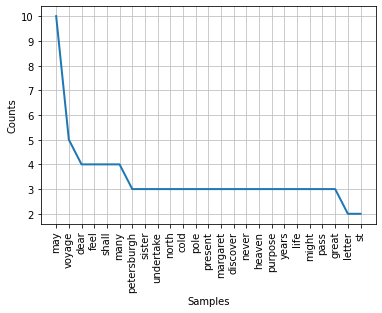

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [9]:
# Step 8: Plot the 25 most frequent terms
# write your code here
freqnltk = nltk.FreqDist(franklemma)
freqnltk.plot(25, cumulative = False)

## Exercise 8.2 
### IRIS
Do the following:
- Load the **iris.csv** dataset into a numpy array. The first 4 columns are the  features/attributes. The last column is the class. Simply load the class as a list of strings. You can use the CVS method to load the features into a list of lists (X) and to load the gold label as a list (y). Then, convert X and y into a numpy array (hint: use np.array() for the conversion).
- Use train_test_split() to split the iris dataset into train and test. (use 0.2 for the test_size)
- Train an SVM classifier on the train split and evaluate it using accuracy on the test split.
- Try using a different classifier, a random forest, and see how it compares to the SVM classifier.  
  
Note that this is a toy dataset, so all scores will be high.

In [10]:
## STep 1 Load the data
import csv
import numpy as np
X = [] # Will be a list of lists
y = [] # will be a list

## Write below your code
with open('iris.csv') as infile:
    for row in infile:
        column = row.strip().split(',')
        X.append([float(x) for x in column[:-1]])
        y.append(column[-1])

x = np.array(X)
y = np.array(y)

In [11]:
assert(len(set(y))==3)

In [12]:
### Step 2: Split data in train and test
from sklearn.model_selection import train_test_split

# Write your code here
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.3, random_state=0)

In [13]:
### Step 3: Train a SVM classifier, predict the labels, and calculate the accuracy
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Write your code here
clf_svm = SVC()
clf_svm.fit(xtrain, ytrain)

svmpred = clf_svm.predict(xtest)
svmaccuracy = accuracy_score(ytest, svmpred)

print("SVM Accuracy: {}".format(svmaccuracy))

SVM Accuracy: 0.9777777777777777


In [14]:
### Step 4: Train a Random Forest Classifier, predict the labels, measure the accuracy, and print the classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Write your code here
rfc = RandomForestClassifier(n_estimators = 200, random_state = 0)
rfc.fit(xtrain, ytrain)

rfcpred = rfc.predict(xtest)
rfcaccuracy = accuracy_score(ytest, rfcpred)

print(confusion_matrix(ytest, rfcpred))
print(classification_report(ytest, rfcpred))
print("RFC Accuracy: {}".format(rfcaccuracy))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

RFC Accuracy: 0.9777777777777777
